# Assignment 2: Wikipedia Graph Analysis
---
*Anupam Kumar (11940160)*

In [21]:
import pandas as pd

dataset = pd.read_csv('/content/scraped_data.csv')
dataset = dataset[['Link','Label']]

In [22]:
dataset  = dataset.dropna() # drop rows with NaN values

## Data Cleaning
For links which are repeated and been assigned different labels, we will remove the repeated links and assign the same label to the first link.
The assigned label will the most frequent label given to that link.

In [23]:
for j in range(len(dataset)): # for each row
  labels = [] # create empty list

  for i in range(len(dataset)): # for each row
    try: # if there is a value
      try:
        t1 = dataset['Link'][j] 
      except: # if there is no value
        pass
      try:
        t2 = dataset['Link'][i]
      except:
        pass

      if t1 == t2: # if the values are the same
        try: # if there is a value
          labels.append(dataset['Label'][i]) # append the value
        except:
          pass
    
    except ValueError: # if there is no value
      pass

  List = labels # create a new list
  counter = 0 # create a counter
  num = List[0] # create a variable to store the first value
    
  for i in List:  # for each value in the list
      current = List.count(i) # count the number of times the value appears
      if(current> counter): # if the number of times the value appears is greater than the current value
          counter = current # set the current value to the number of times the value appears
          num = i # set the value to the value

  cur_label = num # set the current label to the value

  for i in range(len(dataset)): # for each row
    try: # if there is a value
      t1 = dataset['Link'][j]
    except: # if there is no value
      pass
    try:
      t2 = dataset['Link'][i]
    except:
      pass
    if (t1 == t2): # if the values are the same
      try:
        dataset[i]['Link'] = cur_label # set the value to the current label
      except:
        pass

dataset = dataset.drop_duplicates() # drop duplicate rows

print(dataset.head()) # print the first 5 rows


                                                Link  Label
0   https://en.wikipedia.org/wiki/Quadratic_equation    1.0
1       https://en.wikipedia.org/wiki/Complex_number    1.0
2     https://en.wikipedia.org/wiki/Bayes%27_theorem    2.0
3      https://en.wikipedia.org/wiki/Line_(geometry)    1.0
4  https://en.wikipedia.org/wiki/Function_(mathem...    1.0


## Creation of Root Nodes

In [24]:
# As of now, we assign 10 as the number of root nodes
n = 10
root = [] # root nodes
difficulty = {} # dictionary to store difficulty of each node

for i in range(n):
    cur_node = dataset['Link'][i] # get the current node
    label = dataset['Label'][i] # get the label of the current node
    
    difficulty[cur_node] = label # add the difficulty of the current node to the dictionary
    root.append(cur_node) # add the current node to the root nodes

print(root)

['https://en.wikipedia.org/wiki/Quadratic_equation', 'https://en.wikipedia.org/wiki/Complex_number', 'https://en.wikipedia.org/wiki/Bayes%27_theorem', 'https://en.wikipedia.org/wiki/Line_(geometry)', 'https://en.wikipedia.org/wiki/Function_(mathematics)', 'https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule', 'https://en.wikipedia.org/wiki/Intermediate_value_theorem', "https://en.wikipedia.org/wiki/Mean_value_theorem#Cauchy's_mean_value_theorem", 'https://en.wikipedia.org/wiki/Rolle%27s_theorem', 'https://en.wikipedia.org/wiki/Derivative']


## Construction of the graph and its traversel

In [25]:
import requests
from bs4 import BeautifulSoup

queue = [] # queue to store the nodes

for i in range(len(root)):
    queue.append(root[i])

visited = [] # visited nodes
parent = {} # dictionary to store the parent of each node

while(len(queue)!=0):
    temp_root = queue.pop(0) # get the first node from the queue
    
    # get all the children of the current node
    req = requests.get(temp_root)
    page = BeautifulSoup(req.content, 'html.parser') # parse the page
    
    links = page.find_all('a') # get all the links
    child = [] # list to store the children
    
    for link in links: # for each link
        temp = link.get('href') # get the link
        if temp is not None and temp.startswith('/wiki/') and ":" not in temp: # if the link is a wikipedia link
            final_link = 'https://en.wikipedia.org' + temp # get the final link
            found = False # flag to check if the link is already in the child list
            for x in range(len(child)): # for each child
                if child[x]==final_link: # if the link is already in the child list
                    found = True
                    break
            
            if found==False: # if the link is not in the child list
                child.append(final_link) # add the link to the child list
                if len(child)==10: # if the child list is full
                    break
    
    for i in range(len(child)): # for each child
        if child[i] not in visited: # if the child is not visited
            visited.append(child[i]) # add the child to the visited list
            parent[child[i]] = temp_root
    
    if len(queue)>1000: # if the queue is full
        break 

## Creation of Adjacency List for the Graph

In [26]:
graph = {} # adjacency list

for child in parent: # for each child
    if parent[child] not in graph: # if the parent is not in the adjacency list
        graph[parent[child]] = [] # add the parent to the adjacency list
    
    graph[parent[child]].append(child) # add the child to the adjacency list

for i in graph:
    print(i)
    print(graph[i])

https://en.wikipedia.org/wiki/Quadratic_equation
['https://en.wikipedia.org/wiki/Quadratic_formula', 'https://en.wikipedia.org/wiki/Quadratic_function', 'https://en.wikipedia.org/wiki/Algebra', 'https://en.wikipedia.org/wiki/Latin_language', 'https://en.wikipedia.org/wiki/Square_(algebra)', 'https://en.wikipedia.org/wiki/Equation', 'https://en.wikipedia.org/wiki/Linear_equation', 'https://en.wikipedia.org/wiki/Coefficient', 'https://en.wikipedia.org/wiki/Solution_(mathematics)', 'https://en.wikipedia.org/wiki/Zero_of_a_function']
https://en.wikipedia.org/wiki/Complex_number
['https://en.wikipedia.org/wiki/Argand_diagram', 'https://en.wikipedia.org/wiki/Complex_plane', 'https://en.wikipedia.org/wiki/Imaginary_unit', 'https://en.wikipedia.org/wiki/Mathematics', 'https://en.wikipedia.org/wiki/Number_system', 'https://en.wikipedia.org/wiki/Real_number', 'https://en.wikipedia.org/wiki/Imaginary_number', 'https://en.wikipedia.org/wiki/Ren%C3%A9_Descartes', 'https://en.wikipedia.org/wiki/Math

## Visualise and Display the Graph formed

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

# Visualise the class to visulaise the graph
class GraphVisualization:
    def __init__(self):
        self.visual = [] # list to store the visualisation
    
    # addEdge - adds an edge to the visualisation
    def addEdge(self,u,v):
        self.visual.append((u,v)) # add the edge to the visualisation
    
    # visualize - visualises the graph
    def visualize(self):
        G_vis = nx.Graph() # create a graph
        G_vis.add_edges_from(self.visual) # add the edges to the graph
        nx.draw_networkx(G_vis) # draw the graph
        plt.rcParams['figure.figsize'] = [50, 50] # set the size of the graph to be displayed
        plt.show() # display the graph

    def getGraph(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        return G


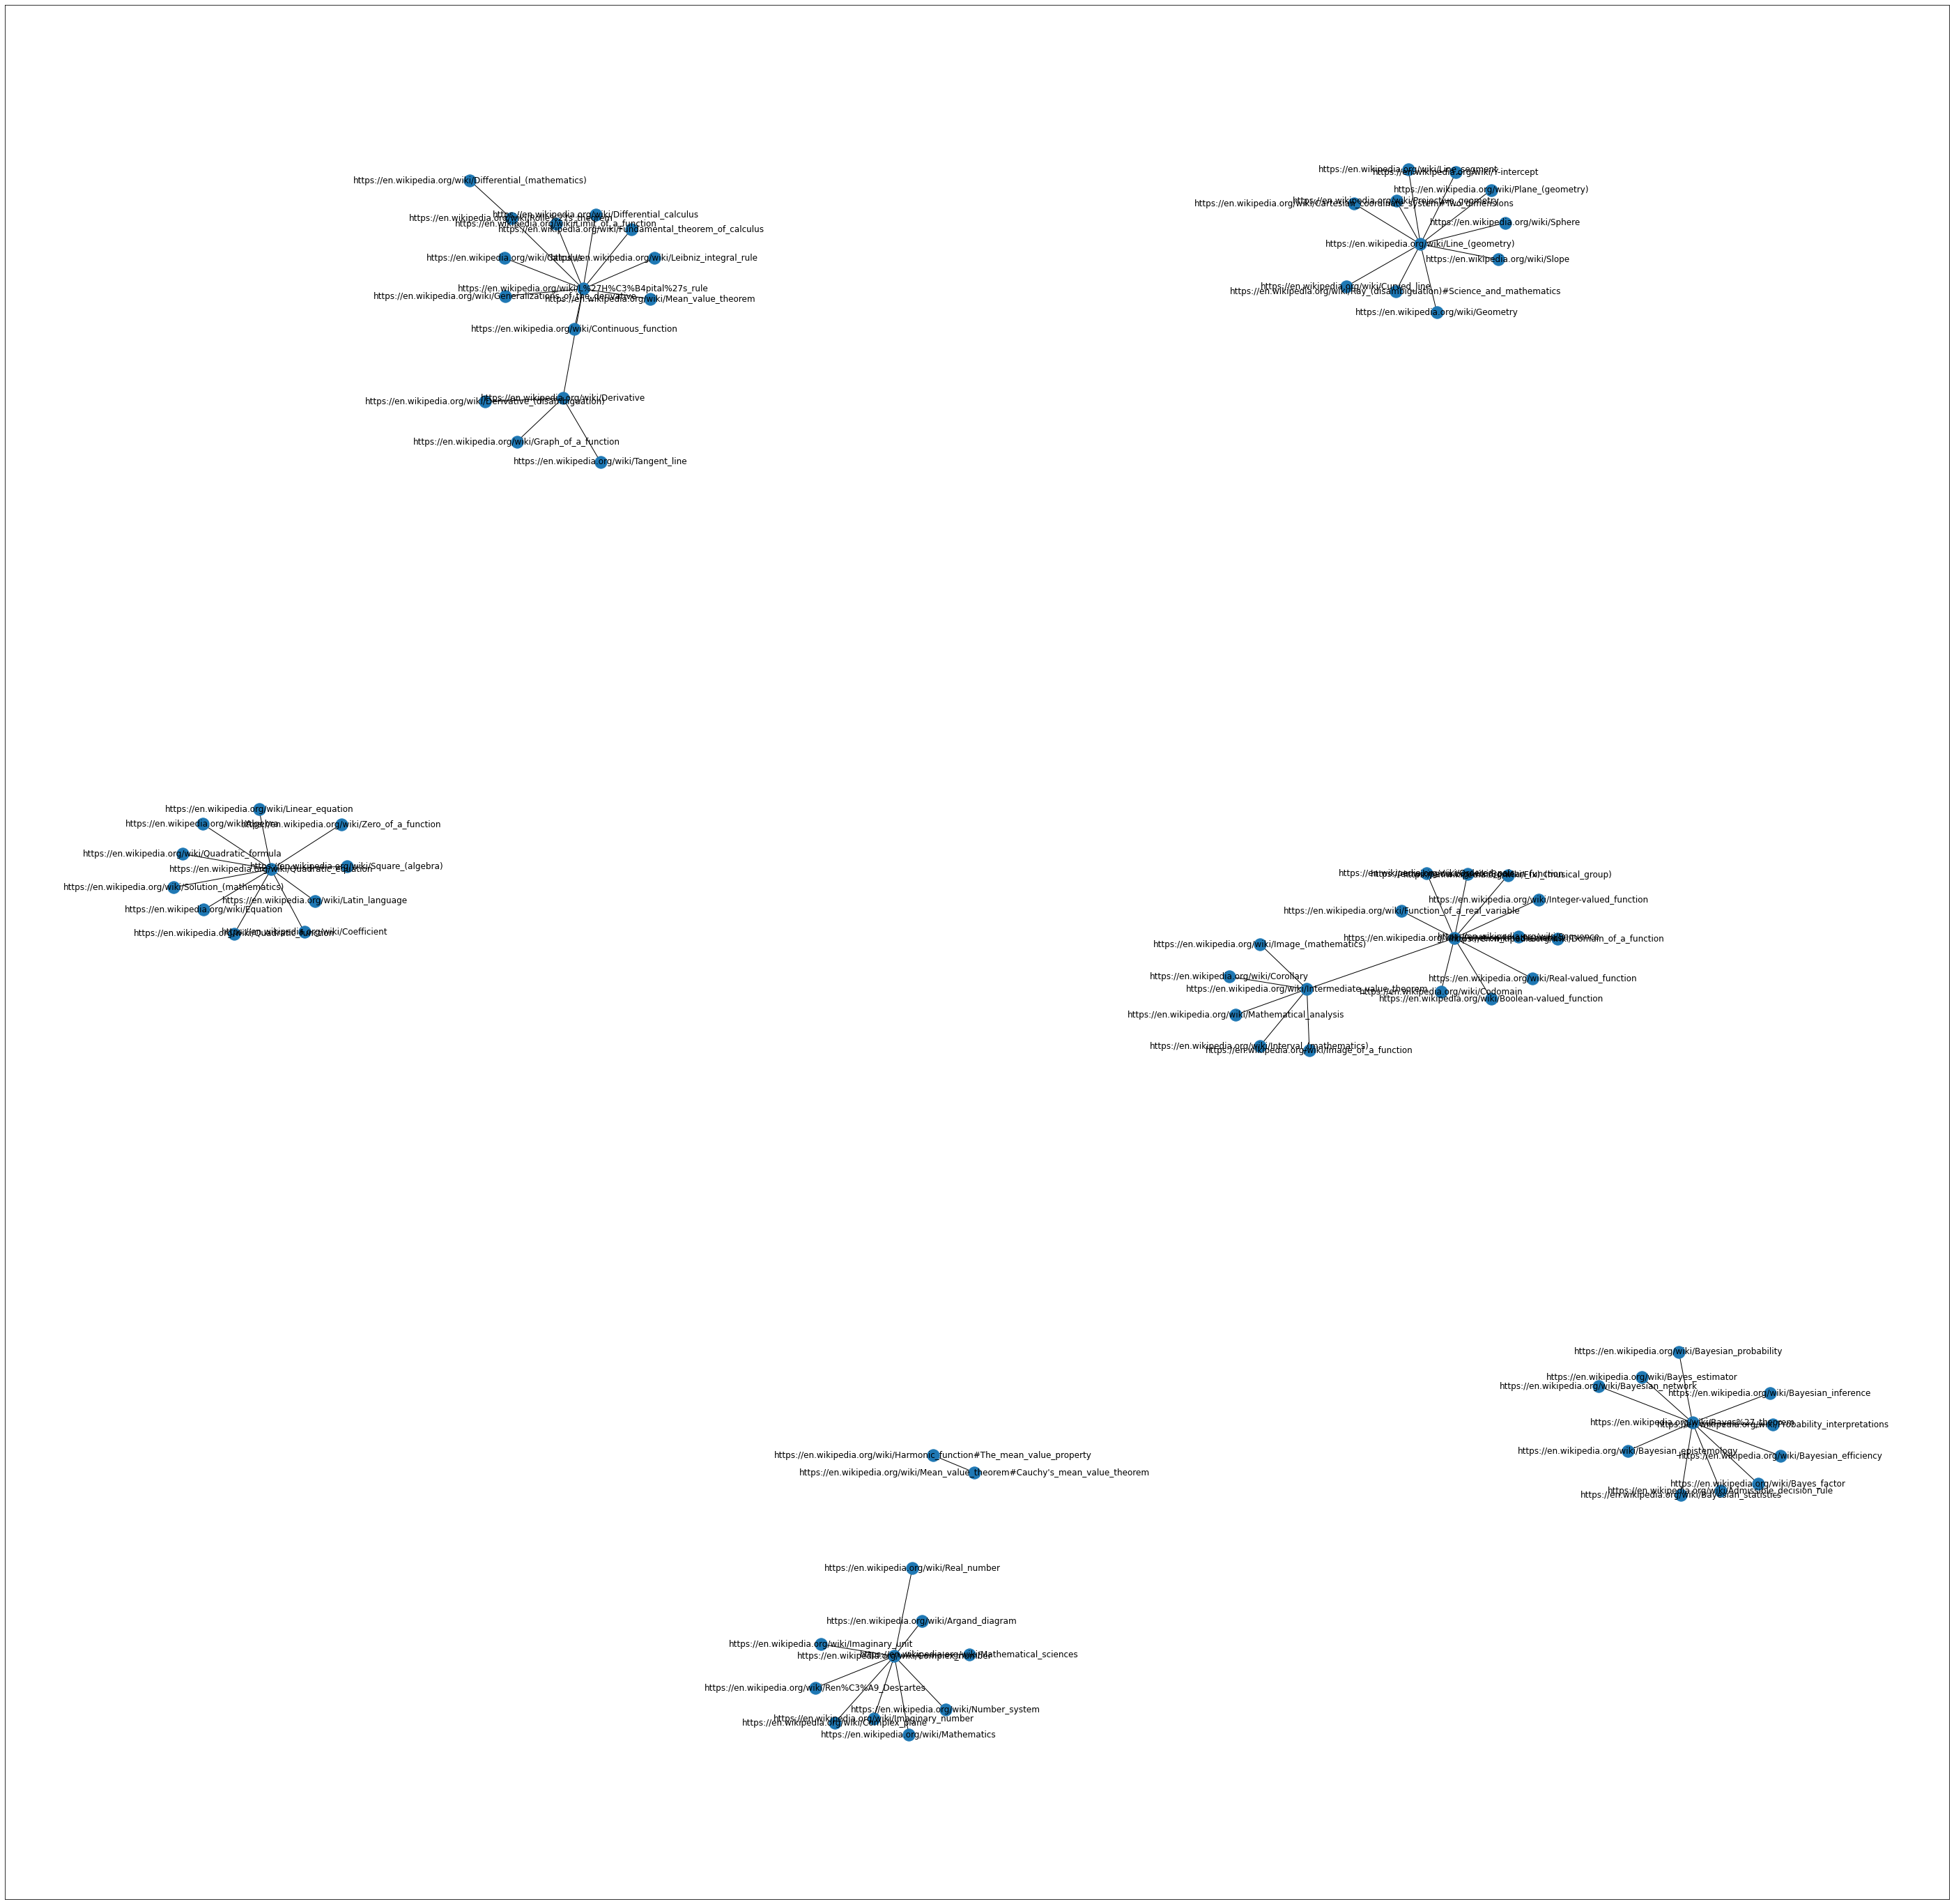

In [32]:
# Visualise the graph
G_vis = GraphVisualization()

for i in graph:
    for edge in graph[i]:
        G_vis.addEdge(i,edge) # add the edge to the visualisation

G_vis.visualize() # visualise the graph

## Calculation of Centrality Metrics and Clustering Coefficient of the Graph

In [28]:
# Calculate the degree centrality of the graph
def degree_centrality(graph):
    degree_centrality = {} # dictionary to store the degree centrality of each node
    for i in graph:
        degree_centrality[i] = len(graph[i]) # add the degree centrality of each node to the dictionary
    return degree_centrality

degree_centrality = degree_centrality(graph) # calculate the degree centrality of the graph
# print the degree centrality
print(degree_centrality)

{'https://en.wikipedia.org/wiki/Quadratic_equation': 10, 'https://en.wikipedia.org/wiki/Complex_number': 9, 'https://en.wikipedia.org/wiki/Bayes%27_theorem': 10, 'https://en.wikipedia.org/wiki/Line_(geometry)': 10, 'https://en.wikipedia.org/wiki/Function_(mathematics)': 10, 'https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule': 10, 'https://en.wikipedia.org/wiki/Intermediate_value_theorem': 6, "https://en.wikipedia.org/wiki/Mean_value_theorem#Cauchy's_mean_value_theorem": 1, 'https://en.wikipedia.org/wiki/Rolle%27s_theorem': 1, 'https://en.wikipedia.org/wiki/Derivative': 3}


In [18]:
# Calculation of Closeness centrality of the graph
# since the graph is disconnected, we do not normalise the closeness centrality by multiplying it with number of nodes-1
def closeness_centrality(graph):
    closeness_centrality = {} # closeness centrality dictionary
    for i in graph: # for each node
        degree = 0 # degree of the node
        for j in graph[i]: # for each edge
            degree += 1 # increment the degree
        closeness_centrality[i] = 1/degree # calculate the closeness centrality
    return closeness_centrality

closeness_centrality = closeness_centrality(graph) # calculate the closeness centrality of the graph
# print the closeness centrality
print("Closeness Centrality:")
for i in closeness_centrality:
    print(f"{i}: {closeness_centrality[i]}")

Closeness Centrality:
https://en.wikipedia.org/wiki/Quadratic_equation: 0.1
https://en.wikipedia.org/wiki/Complex_number: 0.1111111111111111
https://en.wikipedia.org/wiki/Bayes%27_theorem: 0.1
https://en.wikipedia.org/wiki/Line_(geometry): 0.1
https://en.wikipedia.org/wiki/Function_(mathematics): 0.1
https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule: 0.1
https://en.wikipedia.org/wiki/Intermediate_value_theorem: 0.16666666666666666
https://en.wikipedia.org/wiki/Mean_value_theorem#Cauchy's_mean_value_theorem: 1.0
https://en.wikipedia.org/wiki/Rolle%27s_theorem: 1.0
https://en.wikipedia.org/wiki/Derivative: 0.3333333333333333


In [84]:
# Betweeness centrality
import networkx as nx 

G = nx.Graph()
#adding edges
for i in graph:
  for j in graph[i]:
    G.add_edge(i,j)
# G is Graph, parameters normalized
# and endpoints ensure whether we normalize the value
# and consider the endpoints respectively.
bet_centrality = nx.betweenness_centrality(G, normalized = True,endpoints = False) # calculate the betweeness centrality of the graph
print(bet_centrality)

{'https://en.wikipedia.org/wiki/Quadratic_equation': 0.015789473684210527, 'https://en.wikipedia.org/wiki/Quadratic_formula': 0.0, 'https://en.wikipedia.org/wiki/Quadratic_function': 0.0, 'https://en.wikipedia.org/wiki/Algebra': 0.0, 'https://en.wikipedia.org/wiki/Latin_language': 0.0, 'https://en.wikipedia.org/wiki/Square_(algebra)': 0.0, 'https://en.wikipedia.org/wiki/Equation': 0.0, 'https://en.wikipedia.org/wiki/Linear_equation': 0.0, 'https://en.wikipedia.org/wiki/Coefficient': 0.0, 'https://en.wikipedia.org/wiki/Solution_(mathematics)': 0.0, 'https://en.wikipedia.org/wiki/Zero_of_a_function': 0.0, 'https://en.wikipedia.org/wiki/Complex_number': 0.01263157894736842, 'https://en.wikipedia.org/wiki/Argand_diagram': 0.0, 'https://en.wikipedia.org/wiki/Complex_plane': 0.0, 'https://en.wikipedia.org/wiki/Imaginary_unit': 0.0, 'https://en.wikipedia.org/wiki/Mathematics': 0.0, 'https://en.wikipedia.org/wiki/Number_system': 0.0, 'https://en.wikipedia.org/wiki/Real_number': 0.0, 'https://e

In [85]:
# Page rank
import networkx as nx # import networkx as nx

G = nx.Graph()
#adding edges
for i in graph: # for each node
  for j in graph[i]:
    G.add_edge(i,j) # add the edge to the graph

pr = nx.pagerank(G, alpha = 0.8) # calculate the page rank with the given alpha

print(pr) # print the page rank

{'https://en.wikipedia.org/wiki/Quadratic_equation': 0.06493223661409313, 'https://en.wikipedia.org/wiki/Quadratic_formula': 0.007792490624304975, 'https://en.wikipedia.org/wiki/Quadratic_function': 0.007792490624304975, 'https://en.wikipedia.org/wiki/Algebra': 0.007792490624304975, 'https://en.wikipedia.org/wiki/Latin_language': 0.007792490624304975, 'https://en.wikipedia.org/wiki/Square_(algebra)': 0.007792490624304975, 'https://en.wikipedia.org/wiki/Equation': 0.007792490624304975, 'https://en.wikipedia.org/wiki/Linear_equation': 0.007792490624304975, 'https://en.wikipedia.org/wiki/Coefficient': 0.007792490624304975, 'https://en.wikipedia.org/wiki/Solution_(mathematics)': 0.007792490624304975, 'https://en.wikipedia.org/wiki/Zero_of_a_function': 0.007792490624304975, 'https://en.wikipedia.org/wiki/Complex_number': 0.05916054509997311, 'https://en.wikipedia.org/wiki/Argand_diagram': 0.007856620530017419, 'https://en.wikipedia.org/wiki/Complex_plane': 0.007856620530017419, 'https://en.

In [ ]:
print(graph)

{'https://en.wikipedia.org/wiki/Quadratic_equation': ['https://en.wikipedia.org/wiki/Quadratic_formula', 'https://en.wikipedia.org/wiki/Quadratic_function', 'https://en.wikipedia.org/wiki/Algebra', 'https://en.wikipedia.org/wiki/Latin_language', 'https://en.wikipedia.org/wiki/Square_(algebra)', 'https://en.wikipedia.org/wiki/Equation', 'https://en.wikipedia.org/wiki/Linear_equation', 'https://en.wikipedia.org/wiki/Coefficient', 'https://en.wikipedia.org/wiki/Solution_(mathematics)', 'https://en.wikipedia.org/wiki/Zero_of_a_function'], 'https://en.wikipedia.org/wiki/Complex_number': ['https://en.wikipedia.org/wiki/Argand_diagram', 'https://en.wikipedia.org/wiki/Complex_plane', 'https://en.wikipedia.org/wiki/Imaginary_unit', 'https://en.wikipedia.org/wiki/Mathematics', 'https://en.wikipedia.org/wiki/Number_system', 'https://en.wikipedia.org/wiki/Real_number', 'https://en.wikipedia.org/wiki/Imaginary_number', 'https://en.wikipedia.org/wiki/Ren%C3%A9_Descartes', 'https://en.wikipedia.org/w

In [65]:
# Clustering coefficient
import networkx as nx

# iterate over node i of graph
for i in graph:
  #find the degree of node i
  degree = len(graph[i])
  #total number neighbour's of i which are connected
  no_of_links=0

  #child 1 of graph
  for c1 in graph[i]:
    #child 2 of graph
    for c2 in graph[i]:
      # child 1 not equal to child 2
      if c1 != c2:
        #check child 1 node is in graph
        if c1 in graph:
          # check child's of child 1
          if c2 in graph[c1]:
            #if the child 1 is child of child 2
            no_of_links+=1

  #if if degree if greater than 1
  if degree > 1:
    ans = (2*no_of_links)/(degree*(degree-1))
    print(f"clustering coefficient of {i}: {ans}")

clustering coefficient of https://en.wikipedia.org/wiki/Quadratic_equation: 0.0
clustering coefficient of https://en.wikipedia.org/wiki/Complex_number: 0.0
clustering coefficient of https://en.wikipedia.org/wiki/Bayes%27_theorem: 0.0
clustering coefficient of https://en.wikipedia.org/wiki/Line_(geometry): 0.0
clustering coefficient of https://en.wikipedia.org/wiki/Function_(mathematics): 0.0
clustering coefficient of https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule: 0.0
clustering coefficient of https://en.wikipedia.org/wiki/Intermediate_value_theorem: 0.0
clustering coefficient of https://en.wikipedia.org/wiki/Derivative: 0.0


In [34]:
!pip install node2vec

  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=d678e02823a74216dac9a24ebd7259ba6468ba0ee19accce818d5018a36f608d
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [36]:
# conversion of Node to vector
import networkx as nx
from node2vec import Node2Vec
# define the graph to be used in the node2vec
ncmGraph = G_vis.getGraph()
# use the Node2vec to generate graph embeddings
node2vec = Node2Vec(ncmGraph, dimensions=16, walk_length=80, num_walks=10, workers=1)
# get the embeddings
embeddings = node2vec.fit(window=10, min_count=1, batch_words=4)
print(embeddings)

Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.79it/s]


Word2Vec(vocab=77, size=16, alpha=0.025)


In [63]:
# calculate the betweenness centrality of the graph
def betweenness_centrality(graph):
    betweenness_centrality = nx.betweenness_centrality(graph) # calculate the betweenness centrality of the graph
    return betweenness_centrality

betweenness_centrality = betweenness_centrality(ncmGraph)
print(betweenness_centrality)

{'https://en.wikipedia.org/wiki/Quadratic_equation': 0.015789473684210527, 'https://en.wikipedia.org/wiki/Quadratic_formula': 0.0, 'https://en.wikipedia.org/wiki/Quadratic_function': 0.0, 'https://en.wikipedia.org/wiki/Algebra': 0.0, 'https://en.wikipedia.org/wiki/Latin_language': 0.0, 'https://en.wikipedia.org/wiki/Square_(algebra)': 0.0, 'https://en.wikipedia.org/wiki/Equation': 0.0, 'https://en.wikipedia.org/wiki/Linear_equation': 0.0, 'https://en.wikipedia.org/wiki/Coefficient': 0.0, 'https://en.wikipedia.org/wiki/Solution_(mathematics)': 0.0, 'https://en.wikipedia.org/wiki/Zero_of_a_function': 0.0, 'https://en.wikipedia.org/wiki/Complex_number': 0.01263157894736842, 'https://en.wikipedia.org/wiki/Argand_diagram': 0.0, 'https://en.wikipedia.org/wiki/Complex_plane': 0.0, 'https://en.wikipedia.org/wiki/Imaginary_unit': 0.0, 'https://en.wikipedia.org/wiki/Mathematics': 0.0, 'https://en.wikipedia.org/wiki/Number_system': 0.0, 'https://en.wikipedia.org/wiki/Real_number': 0.0, 'https://e

In [37]:
# Create a dataframe of the embeddings
embeddings_df = pd.DataFrame([embeddings.wv.get_vector(str(i)) for i in ncmGraph.nodes()],index = ncmGraph.nodes())
# print the dataframe
print(embeddings_df)



                                                          0         1   \
https://en.wikipedia.org/wiki/Quadratic_equation   -1.535456 -0.961686   
https://en.wikipedia.org/wiki/Quadratic_formula    -1.437447 -0.911484   
https://en.wikipedia.org/wiki/Quadratic_function   -1.423646 -0.884812   
https://en.wikipedia.org/wiki/Algebra              -1.427866 -0.934900   
https://en.wikipedia.org/wiki/Latin_language       -1.425101 -0.927866   
...                                                      ...       ...   
https://en.wikipedia.org/wiki/Harmonic_function... -0.914831 -0.173256   
https://en.wikipedia.org/wiki/Differential_(mat... -1.370414 -0.079050   
https://en.wikipedia.org/wiki/Derivative_(disam... -1.635801  0.613946   
https://en.wikipedia.org/wiki/Graph_of_a_function  -1.623284  0.608011   
https://en.wikipedia.org/wiki/Tangent_line         -1.688947  0.512203   

                                                          2         3   \
https://en.wikipedia.org/wiki/Quadrat

In [39]:
# conversion of link to label
link_to_label = {} # dictionary to store the link to label mapping
for i in dataset.index:
    link_to_label[dataset.loc[i,'Link']] = int(dataset.loc[i,'Label']) # add the link to label mapping to the dictionary
print(link_to_label)

{'https://en.wikipedia.org/wiki/Quadratic_equation': 1, 'https://en.wikipedia.org/wiki/Complex_number': 2, 'https://en.wikipedia.org/wiki/Bayes%27_theorem': 1, 'https://en.wikipedia.org/wiki/Line_(geometry)': 1, 'https://en.wikipedia.org/wiki/Function_(mathematics)': 1, 'https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule': 3, 'https://en.wikipedia.org/wiki/Intermediate_value_theorem': 2, "https://en.wikipedia.org/wiki/Mean_value_theorem#Cauchy's_mean_value_theorem": 3, 'https://en.wikipedia.org/wiki/Rolle%27s_theorem': 3, 'https://en.wikipedia.org/wiki/Derivative': 2, 'https://en.wikipedia.org/wiki/Integral': 1, 'https://en.wikipedia.org/wiki/Integration_by_parts': 1, 'https://en.wikipedia.org/wiki/Triple_product#Scalar_triple_product': 3, 'https://en.wikipedia.org/wiki/Triple_product#Vector_triple_product': 3, 'https://en.wikipedia.org/wiki/Number_theory': 2, 'https://en.wikipedia.org/wiki/Diophantine_geometry': 0, 'https://en.wikipedia.org/wiki/Rational_number': 1, 'https://en.w

In [ ]:
# stores the labelled embeddings in obatined in lin_to_label and make it a dataframe
labelled_embDF = pd.DataFrame()

# stores the unlabeled embeddings for the same
unlabeled_embDF = pd.DataFrame()


for i in embeddings_df.index: # for each node
    if i in link_to_label: # if the node is in the link to label mapping
        labelled_embDF = labelled_embDF.append(embeddings_df.loc[i]) # add the embeddings of the node to the labelled embeddings dataframe
    else:
        unlabeled_embDF = unlabeled_embDF.append(embeddings_df.loc[i]) # add the embeddings of the node to the unlabeled embeddings dataframe

for i in labelled_embDF.index: # for each node
    labelled_embDF.at[i,'Label'] = link_to_label[i] # set the label of the node to the label of the node


In [41]:
labelled_embDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Label
https://en.wikipedia.org/wiki/Quadratic_equation,-1.535456,-0.961686,0.412616,-0.075381,0.876485,1.175992,0.291346,-1.016912,0.420515,0.537096,-1.293306,0.211510,-1.069993,0.075618,-0.213634,-0.095329,1.0
https://en.wikipedia.org/wiki/Quadratic_formula,-1.437447,-0.911484,0.512355,0.141823,0.706911,0.994227,0.470007,-1.091935,0.416909,0.474097,-1.326086,0.299184,-1.203334,0.168005,-0.101096,0.231764,1.0
https://en.wikipedia.org/wiki/Quadratic_function,-1.423646,-0.884812,0.515331,0.086290,0.733877,1.003397,0.428643,-1.118398,0.442759,0.496226,-1.342301,0.275582,-1.145046,0.171458,-0.099816,0.190385,1.0
https://en.wikipedia.org/wiki/Linear_equation,-1.449238,-0.880263,0.532447,0.138918,0.747184,0.925191,0.443555,-1.146663,0.496523,0.499690,-1.355633,0.248322,-1.162381,0.182158,-0.121912,0.267960,3.0
https://en.wikipedia.org/wiki/Complex_number,-1.531210,-0.951599,-1.103077,-0.553265,-0.743751,-0.836544,0.580761,-1.201055,-0.182677,-0.635048,-1.079355,-0.222090,-0.395619,-0.968684,-0.021704,0.125322,2.0


In [42]:
unlabeled_embDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
https://en.wikipedia.org/wiki/Algebra,-1.427866,-0.934900,0.505895,0.093971,0.736798,1.008757,0.453332,-1.096287,0.435729,0.498606,-1.316781,0.262049,-1.166218,0.157079,-0.122168,0.183694
https://en.wikipedia.org/wiki/Latin_language,-1.425101,-0.927866,0.498989,0.130964,0.763880,0.984638,0.416697,-1.116288,0.381908,0.491990,-1.318979,0.268069,-1.204115,0.137904,-0.080793,0.249349
https://en.wikipedia.org/wiki/Square_(algebra),-1.415676,-0.930233,0.515177,0.106777,0.715402,0.981854,0.451849,-1.123204,0.412305,0.489879,-1.306044,0.271738,-1.218079,0.132486,-0.079373,0.247178
https://en.wikipedia.org/wiki/Equation,-1.434326,-0.910118,0.524945,0.080322,0.762504,0.992603,0.440699,-1.100354,0.448544,0.522793,-1.347543,0.247582,-1.171973,0.190892,-0.115395,0.190950
https://en.wikipedia.org/wiki/Coefficient,-1.440666,-0.891078,0.507906,0.151100,0.743879,0.965351,0.444266,-1.125145,0.464269,0.485775,-1.338236,0.272826,-1.189881,0.143410,-0.112137,0.252723


In [43]:
!pip install sklearn

## Model Training using Gradient Boost Classifier in sklearn

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [50]:
col = labelled_embDF.drop(columns = ['Label']).columns.tolist() # list of the columns of the labelled embeddings dataframe

# Splitiing the labelled embeddings dataframe into train and test dataframes
X = labelled_embDF[col].values
Y = labelled_embDF['Label'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) # split the labelled embeddings dataframe into train and test dataframes

# Using the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

# Training the model
gb_clf.fit(x_train, y_train)


GradientBoostingClassifier()

In [51]:
# Prediction by the classifier
y_pred = gb_clf.predict(x_test) 
y_true = y_test # true labels

test_accuracy = accuracy_score(y_true, y_pred) # test accuracy
print(f"Accuracy : {test_accuracy}\n") # print the test accuracy
print(f"Confusion matrix : \n{confusion_matrix(y_true, y_pred)}\n") # print the confusion matrix
print(f"classification Report: \n{classification_report(y_test,gb_clf.predict(x_test))}\n") # print the classification report


Testing Accuracy : 0.6

Confusion matrix : 
[[1 1 1]
 [0 1 0]
 [0 0 1]]

classification Report: 
              precision    recall  f1-score   support

         1.0       1.00      0.33      0.50         3
         2.0       0.50      1.00      0.67         1
         3.0       0.50      1.00      0.67         1

    accuracy                           0.60         5
   macro avg       0.67      0.78      0.61         5
weighted avg       0.80      0.60      0.57         5




**Now, the link can be predicted using the gb_clf() and the 1st element of the result obtained is the label assigned to that link**

In [79]:
predict_eg = [embeddings.wv.get_vector("https://en.wikipedia.org/wiki/Equation")] # list of the embeddings of the nodes to be predicted
print(gb_clf.predict(predict_eg))

[1.]


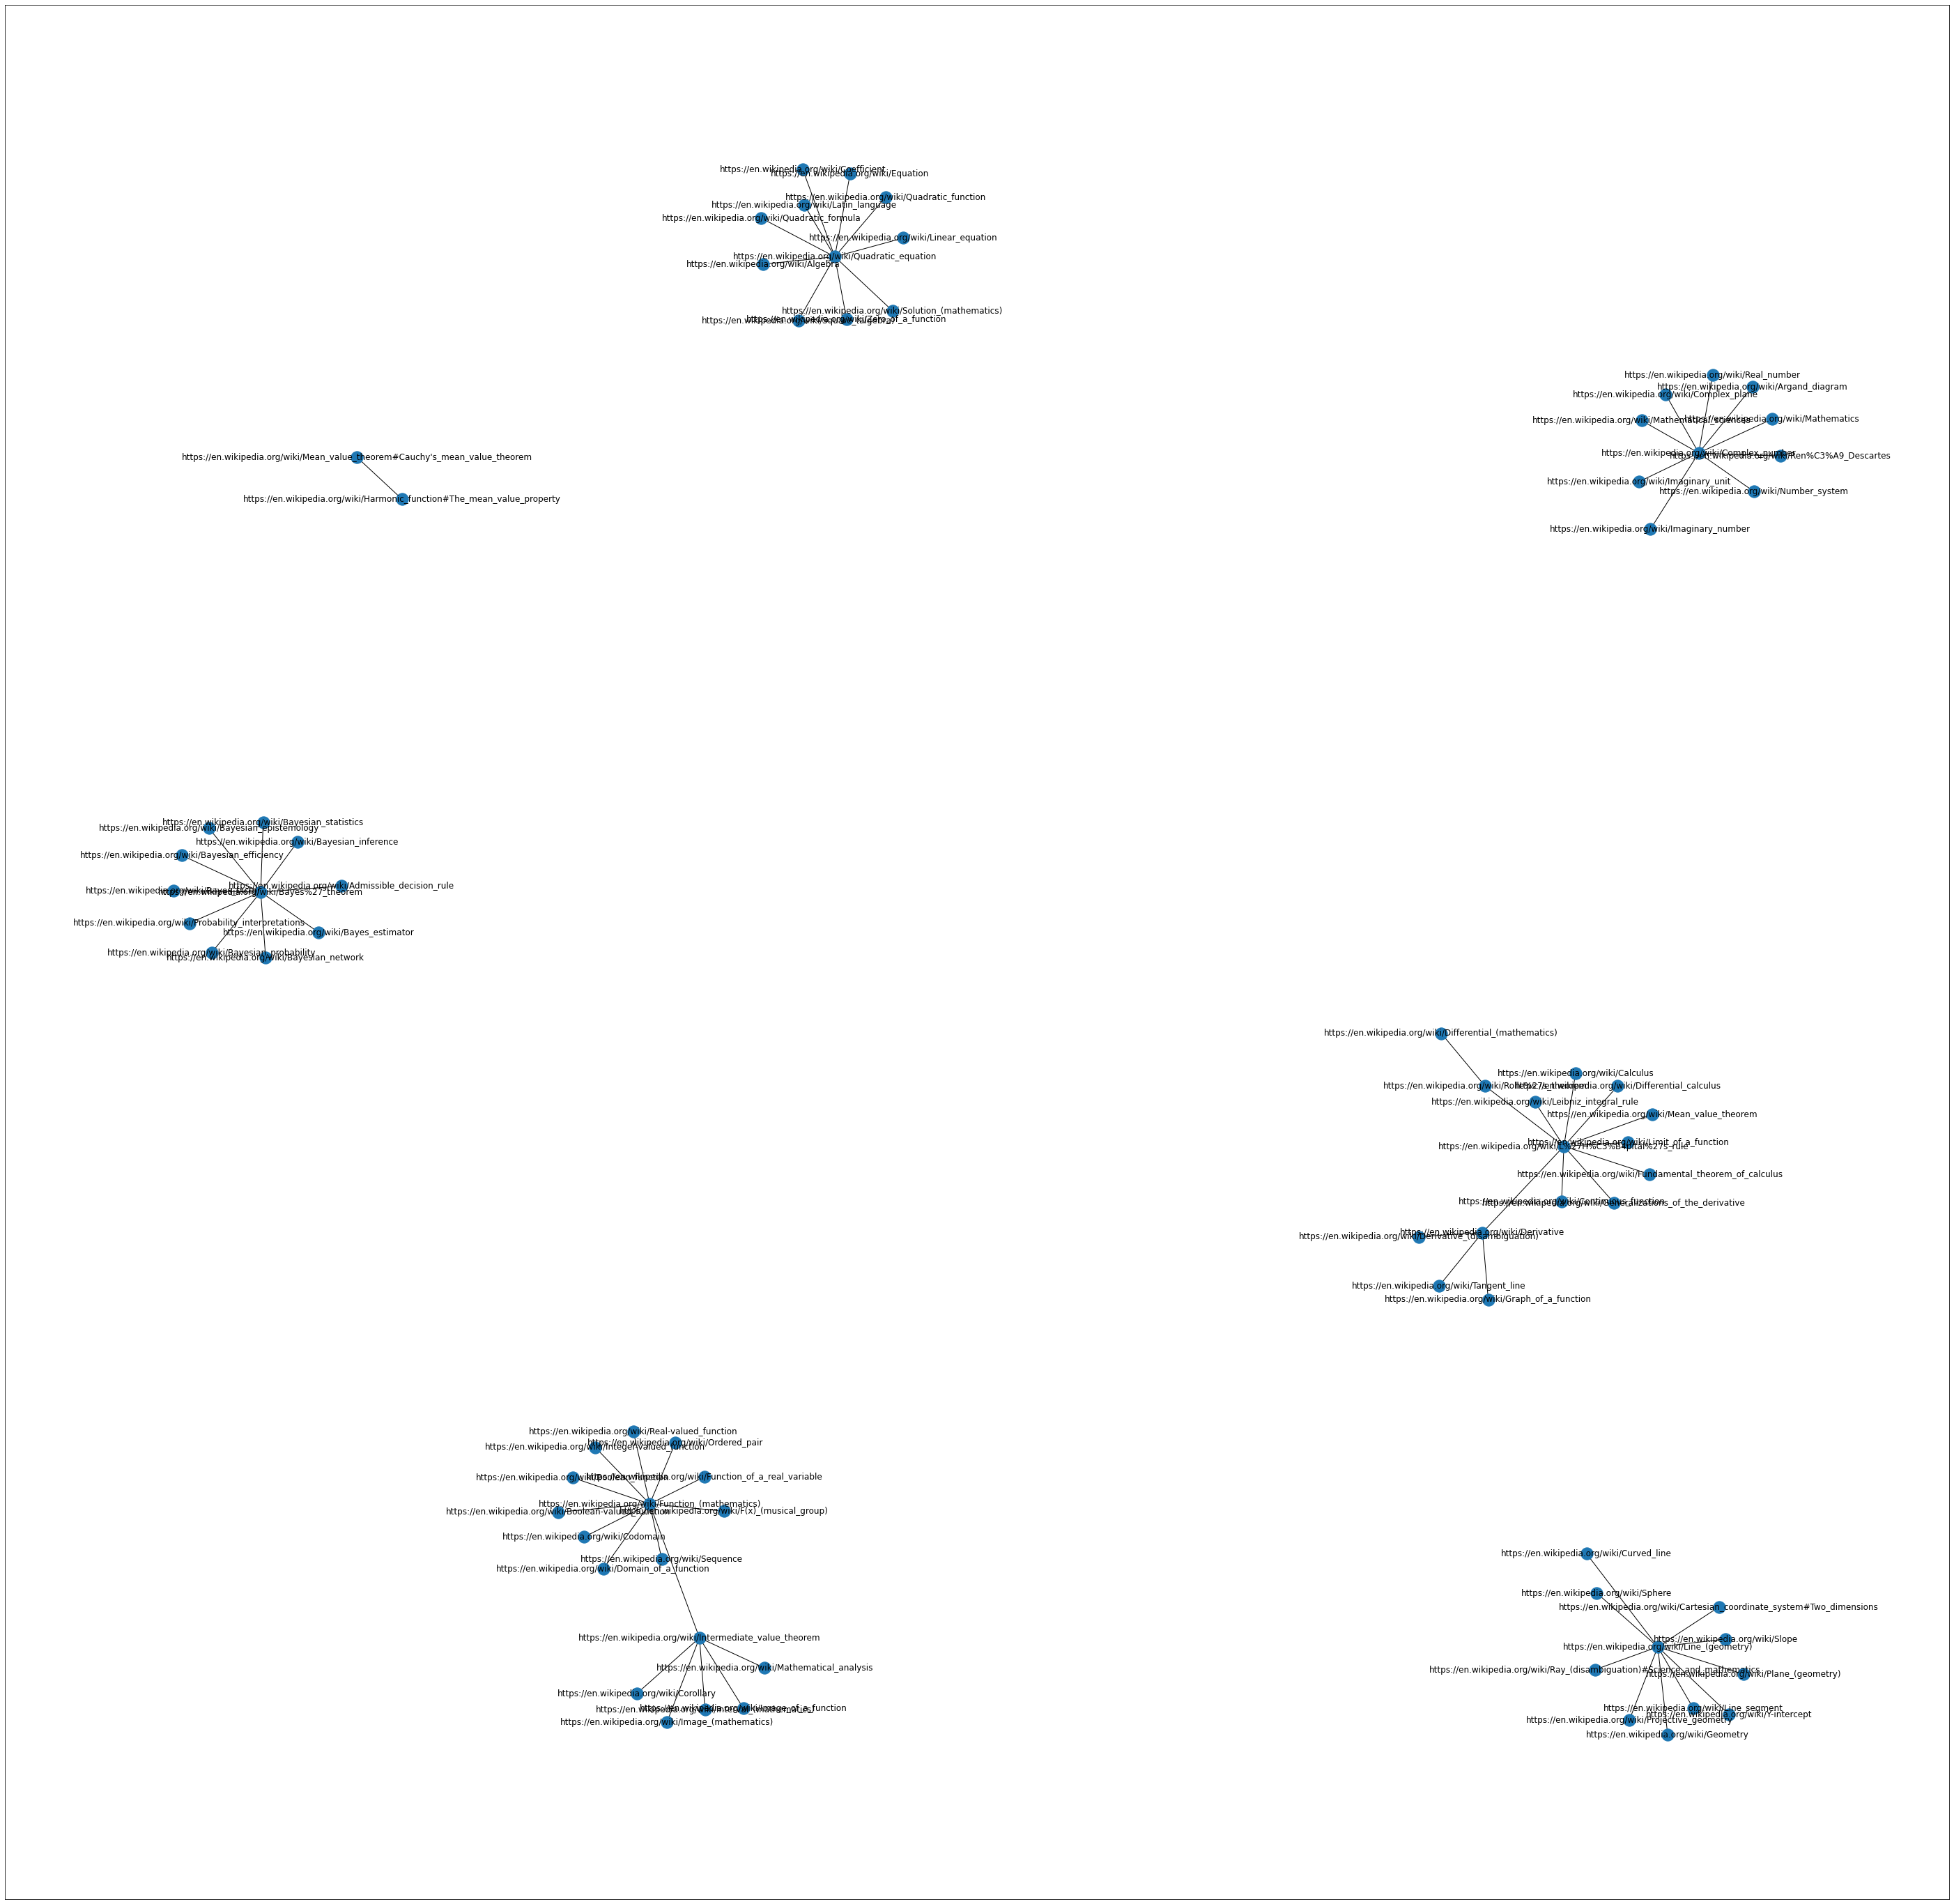

In [80]:
G_vis.visualize() # visualise the graph

In [ ]:

def article_labelling(topic_link):
    topics_difficulty = {} # dictionary to store the topics and difficulty mapping
    # topic_link = 'https://en.wikipedia.org/wiki/Probability' # topic link
    topic_nbd = ncmGraph.neighbors(topic_link) # topic neighbours

    for i in topic_nbd:
        if n in link_to_label:
            topics_difficulty[n] = link_to_label[n] # add the topic and difficulty mapping to the dictionary
        else:
            temp = [embeddings.wv.get_vector(n)]
            topics_difficulty[n] = gb_clf.predict(temp) # add the topic and difficulty mapping to the dictionary

    if topic_link in link_to_label:
        topics_difficulty[topic_link] = link_to_label[topic_link] # add the topic and difficulty mapping to the dictionary
    else:
        temp = [embeddings.wv.get_vector(n)]
        topics_difficulty[topic_link] = gb_clf.predict(temp) # add the topic and difficulty mapping to the dictionary

    # Create differnt topics related to the topic_link according to difficulty
    begginer_topics = []
    intermediate_topics = []
    advanced_topics = []

    for topic in topics_difficulty: # for each topic
        if int(topics_difficulty[topic]) == 1: # if the topic difficulty is 1
            begginer_topics.append(topic)
        elif int(topics_difficulty[topic]) == 2: # if the topic difficulty is 2
            intermediate_topics.append(topic)
        elif int(topics_difficulty[topic]) == 3: # if the topic difficulty is 3
            advanced_topics.append(topic)

    ordered_topics = begginer_topics + intermediate_topics + advanced_topics # combine the topics in the order of difficulty in ascending order
    print(f"Topics to study in order:") # print the ordered topics
    for i in ordered_topics: # for each topic
        print(i)

topic_link = 'https://en.wikipedia.org/wiki/Equation' # topic link
article_labelling(topic_link)